In [1]:
import ROOT
inFileName = "data/fardet_data_2_run44299_R20-11-25-cosfilt.c_r44299.0-r44299.53.cosmic_ntuple.root"
inFile = ROOT.TFile.Open(inFileName, "READ")
tree = inFile.Get("cosmicntuple/cosmicTree")
ROOT.gStyle.SetOptStat(0)

Welcome to JupyROOT 6.26/06


xvszstart0
X vs. Z start0
xvszstop0
title of h0
xvszstart1
X vs. Z start1
xvszstop1
title of h1
xvszstart2
X vs. Z start2
xvszstop2
title of h2
xvszstart3
X vs. Z start3
xvszstop3
title of h3
xvszstart4
X vs. Z start4
xvszstop4
title of h4
xvszstart5
X vs. Z start5
xvszstop5
title of h5
xvszstart6
X vs. Z start6
xvszstop6
title of h6
xvszstart7
X vs. Z start7
xvszstop7
title of h7
xvszstart8
X vs. Z start8
xvszstop8
title of h8
xvszstart9
X vs. Z start9
xvszstop9
title of h9
xvszstart10
X vs. Z start10
xvszstop10
title of h10
xvszstart11
X vs. Z start11
xvszstop11
title of h11
xvszstart12
X vs. Z start12
xvszstop12
title of h12
xvszstart13
X vs. Z start13
xvszstop13
title of h13
xvszstart14
X vs. Z start14
xvszstop14
title of h14
xvszstart15
X vs. Z start15
xvszstop15
title of h15
xvszstart16
X vs. Z start16
xvszstop16
title of h16
xvszstart17
X vs. Z start17
xvszstop17
title of h17
xvszstart18
X vs. Z start18
xvszstop18
title of h18
xvszstart19
X vs. Z start19
xvszstop19
title of h19


Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TFile::Append>: Replacing existing TH1: yvszstart (Potential memory leak).
Warning in <TFile::Append>: Replacing existing TH1: yvszstop (Potential memory leak).


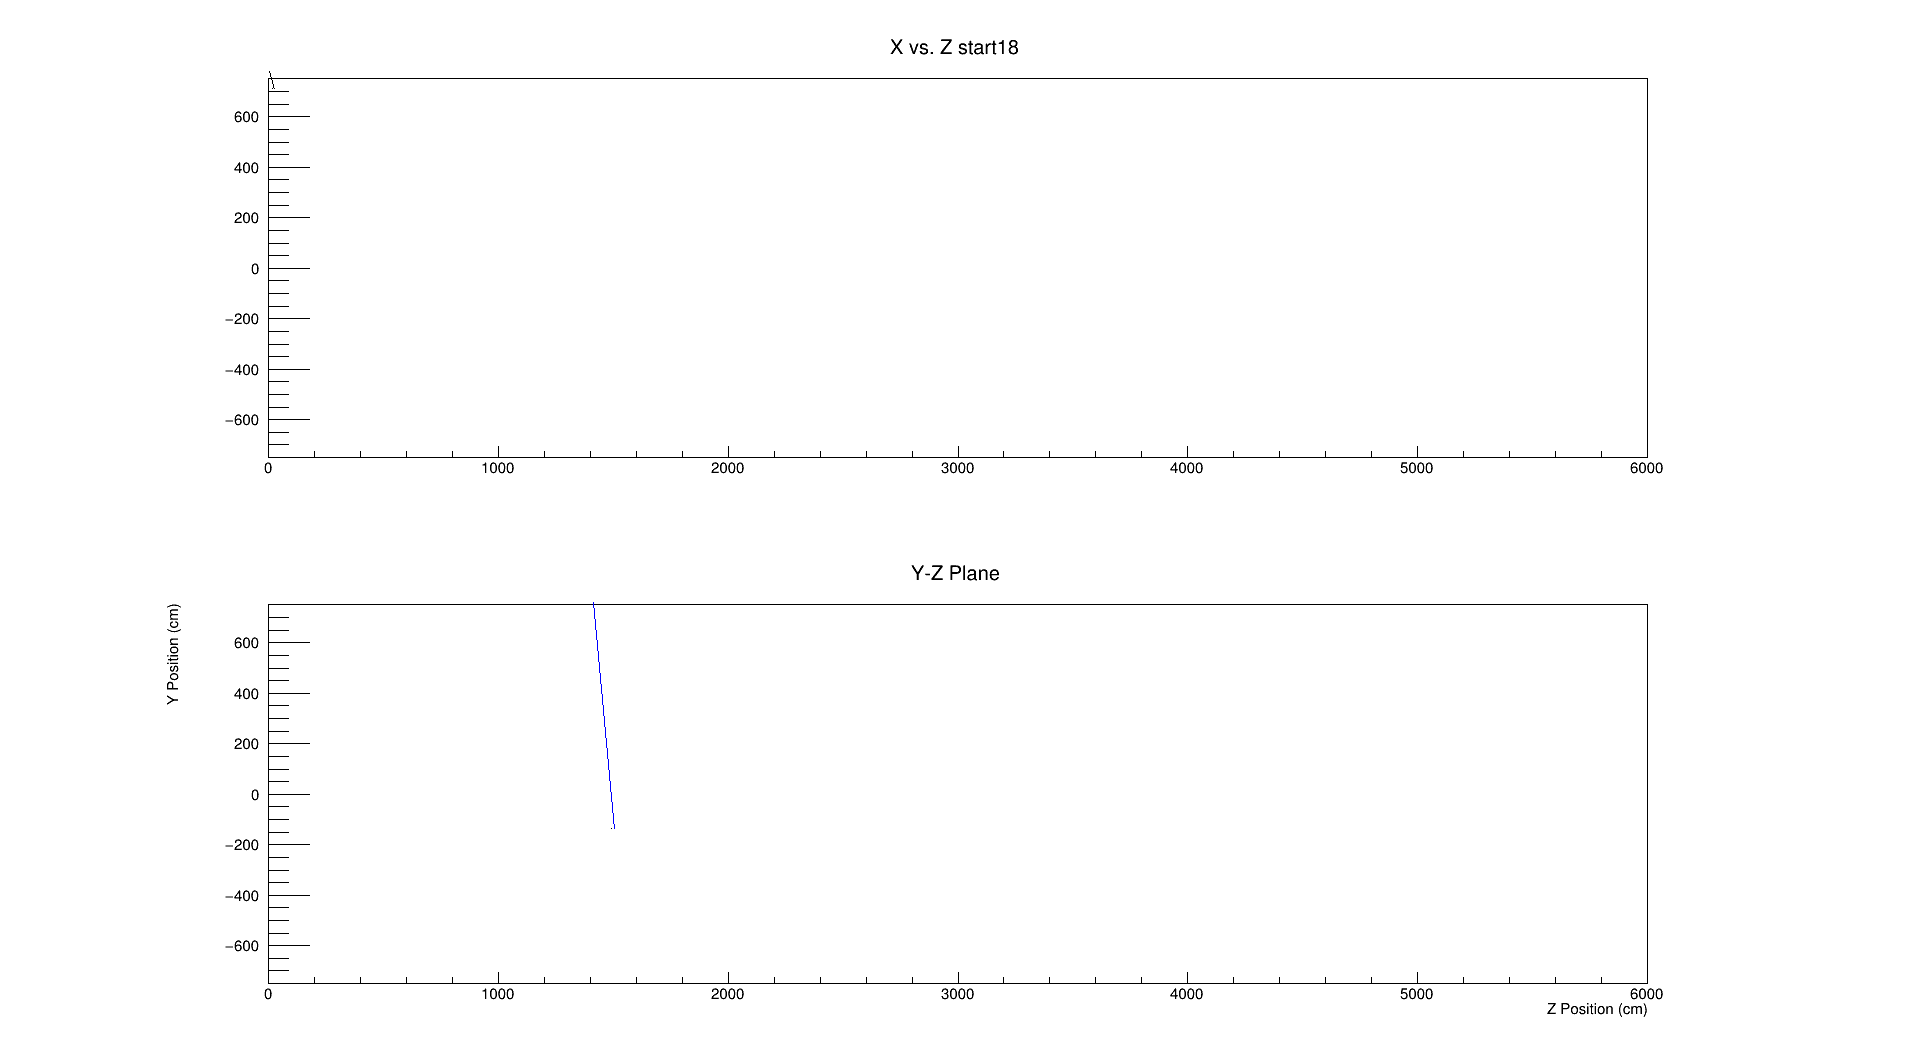

In [10]:
import ROOT


canv = ROOT.TCanvas("c1","Canvas 1", 1920, 1080)
pad1 = ROOT.TPad("pad1","Pad 1",0.05,0.52,0.95,0.97)
pad2 = ROOT.TPad("pad2","Pad 2",0.05,0.02,0.95,0.47)
pad1.Draw()
pad2.Draw()

#xvszstart = ROOT.TH2D("xvszstart", "X-Z Plane", 350, 0, 6000, 350, -750, 750)
#xvszstop = ROOT.TH2D("xvszstop", "X vs Z Stop", 350, 0, 6000, 350, -750, 750)

# create histograms
totalhists = 20
xvszstart = []
xvszstop = []
name = []
title = []
linex = []
# defining our histograms
for iter in range(0, totalhists):
    namestart = "xvszstart%d" % iter
    print(namestart)
    titlestart = "X vs. Z start%d" % iter
    print(titlestart)
    namestop = "xvszstop%d" % iter
    print(namestop)
    titlestop = "title of h%d" % iter
    print(titlestop)
    xvszstart.append(ROOT.TH2D(namestart, titlestart, 350, 0, 6000, 350, -750, 750))
    xvszstop.append(ROOT.TH2D(namestop, titlestop, 350, 0, 6000, 350, -750, 750))

    
pad1.cd()

event = 0
for entryNum in range(1450, 1469):
    tree.GetEntry(entryNum)
    if getattr(tree, "ntrack") == 0:
        continue
    startPosx = getattr(tree, "startPosX")[0]
    startPosz = getattr(tree, "startPosZ")[0]
    stopPosx = getattr(tree, "stopPosX")[0]
    stopPosz = getattr(tree, "stopPosZ")[0]
    print("event number", entryNum)
    
    if entryNum == 1450:
        xvszstart[0].Fill(startPosz, startPosx)
        xvszstop[0].Fill(stopPosz, stopPosx)
        linex.append(ROOT.TLine(startPosz, startPosx, stopPosz, stopPosx))
    if entryNum != 1450:
        event += 1
        print("counter number", event)
        xvszstart[event].Fill(startPosz, startPosx)
        xvszstop[event].Fill(stopPosz, stopPosx)
        linex.append(ROOT.TLine(startPosz, startPosx, stopPosz, stopPosx))
        
linex[0].SetLineColor(ROOT.kBlue)

xvszstart[0].GetYaxis().SetTitle("X Position (cm)")
xvszstart[0].GetXaxis().SetTitle("Z Position (cm)")
if entryNum == 1450: 
    xvszstart[0].Draw()
    xvszstop[0].Draw("same")
if entryNum != 1450:
    xvszstart[event].Draw("same")
    xvszstop[event].Draw("same")
linex[event].Draw()

yvszstart = ROOT.TH2D("yvszstart", "Y-Z Plane", 350, 0, 6000, 350, -750, 750)
yvszstop = ROOT.TH2D("yvszstop", "Y vs Z Stop", 350, 0, 6000, 350, -750, 750)

pad2.cd()
for entryNum in range(0, tree.GetEntries()):
    tree.GetEntry(entryNum)
    if getattr(tree, "ntrack") == 0:
        continue
    startPosy = getattr(tree, "startPosY")[0]
    startPosz = getattr(tree, "startPosZ")[0]
    stopPosy = getattr(tree, "stopPosY")[0]
    stopPosz = getattr(tree, "stopPosZ")[0]
    if entryNum == 1450:
        print("event number", entryNum)
        yvszstart.Fill(startPosz, startPosy)
        yvszstop.Fill(stopPosz, stopPosy)
        liney = ROOT.TLine(startPosz, startPosy, stopPosz, stopPosy)
liney.SetLineColor(ROOT.kBlue)
yvszstart.GetYaxis().SetTitle("Y Position (cm)")
yvszstart.GetXaxis().SetTitle("Z Position (cm)")
yvszstart.Draw()
yvszstop.Draw("same")
liney.Draw()

canv.Draw()